In [26]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
(train_data, train_targets), _ = imdb.load_data(num_words = 10000)

In [ ]:
train_data[0]

In [28]:
def vectorize_sequences(sequences, dimension = 10000):

  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

train_data = vectorize_sequences(train_data)

In [29]:
# Original model

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history_original = model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.6941 - loss: 0.6048 - val_accuracy: 0.8648 - val_loss: 0.4123
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8878 - loss: 0.3612 - val_accuracy: 0.8757 - val_loss: 0.3318
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9189 - loss: 0.2640 - val_accuracy: 0.8879 - val_loss: 0.2882
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9338 - loss: 0.2085 - val_accuracy: 0.8827 - val_loss: 0.2885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9468 - loss: 0.1717 - val_accuracy: 0.8904 - val_loss: 0.2751
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9571 - loss: 0.1470 - val_accuracy: 0.8885 - val_loss: 0.2801
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9643 - loss: 0.1205 - val_accuracy: 0.8817 - val_loss: 0.3086
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9700 - loss: 0.1060 - val_accuracy: 0.8840 - 

In [30]:
# Smaller model

model = keras.Sequential([
    layers.Dense(4, activation = "relu"),
    layers.Dense(4, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history_smaller_model = model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6172 - loss: 0.6604 - val_accuracy: 0.7907 - val_loss: 0.5678
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8002 - loss: 0.5464 - val_accuracy: 0.8075 - val_loss: 0.5237
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8489 - loss: 0.4931 - val_accuracy: 0.8456 - val_loss: 0.4961
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8790 - loss: 0.4661 - val_accuracy: 0.8732 - val_loss: 0.4791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9027 - loss: 0.4366 - val_accuracy: 0.8377 - val_loss: 0.4730
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9109 - loss: 0.4197 - val_accuracy: 0.8778 - val_loss: 0.4549
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9311 - loss: 0.3926 - val_accuracy: 0.8561 - val_loss: 0.4560
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9385 - loss: 0.3834 - val_accuracy: 0.8345 - v

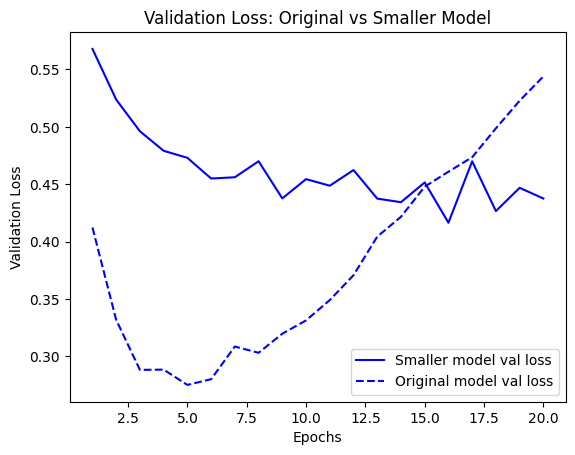

In [31]:
history_original_dict = history_original.history
history_smaller_model_dict = history_smaller_model.history

history_original_val_loss = history_original_dict["val_loss"]
history_smaller_model_val_loss = history_smaller_model_dict["val_loss"]


epochs = range(1, len(history_original_val_loss)+ 1)


plt.plot(epochs, history_smaller_model_val_loss, "b", label="Smaller model val loss")
plt.plot(epochs, history_original_val_loss, "b--", label="Original model val loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss: Original vs Smaller Model")
plt.legend()
plt.show()

In [32]:
# The smaller model starts overfitting later than the reference model
# and its performance degrades more slowly once it starts overfitting.

In [33]:
# Model with higher capacity

model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(512, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

history_larger_model = model.fit(train_data, train_targets, epochs = 20, batch_size = 512, validation_split = .4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6516 - loss: 0.6553 - val_accuracy: 0.8678 - val_loss: 0.3263
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8697 - loss: 0.3333 - val_accuracy: 0.8613 - val_loss: 0.3357
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8944 - loss: 0.2574 - val_accuracy: 0.8456 - val_loss: 0.3651
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9192 - loss: 0.2044 - val_accuracy: 0.8885 - val_loss: 0.2682
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9591 - loss: 0.1275 - val_accuracy: 0.8871 - val_loss: 0.2947
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9644 - loss: 0.1045 - val_accuracy: 0.7932 - val_loss: 0.6522
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9576 - loss: 0.1117 - val_accuracy: 0.8835 - val_loss: 0.3335
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9870 - loss: 0.0500 - val_accuracy: 0.8839 - v

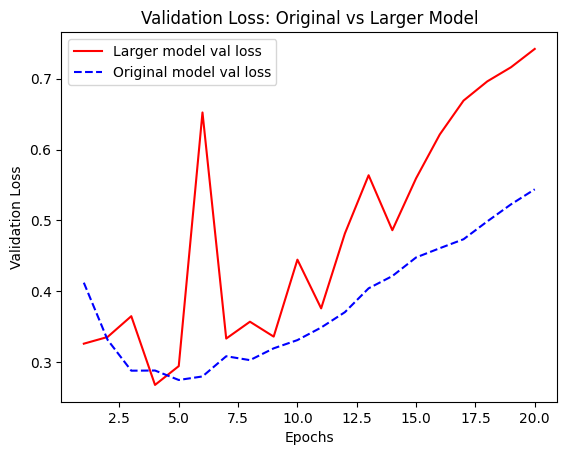

In [34]:
history_larger_model_dict = history_larger_model.history
history_larger_model_val_loss = history_larger_model_dict["val_loss"]

epochs = range(1, len(history_original_val_loss)+ 1)

plt.plot(epochs, history_larger_model_val_loss, "r", label = "Larger model val loss")
plt.plot(epochs, history_original_val_loss, "b--", label="Original model val loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation Loss: Original vs Larger Model")
plt.legend()
plt.show()


In [ ]:
# The bigger model starts overfitting almost immediately
# Low training loss, however, Validation loss is noisier